In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
purchase_prices = pd.read_csv('2017PurchasePricesDec.csv')
beg_inv = pd.read_csv('BegInvFINAL12312016.csv')
end_inv = pd.read_csv('EndInvFINAL12312016.csv')
invoice_purchases = pd.read_csv('InvoicePurchases12312016.csv')
purchases = pd.read_csv('PurchasesFINAL12312016.csv')
sales = pd.read_csv('SalesFINAL12312016.csv')

In [3]:
print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())

print("\nbeg_inv Columns:")
print(beg_inv.columns.tolist())

print("\nend_inv Columns:")
print(end_inv.columns.tolist())

print("\ninvoice_purchases Columns:")
print(invoice_purchases.columns.tolist())

print("\npurchases Columns:")
print(purchases.columns.tolist())

print("\nsales Columns:")
print(sales.columns.tolist())

purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


In [4]:
# Checking for missing data in each dataset
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name , data in zip(dataset_names , datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty:
        print(f"\n Misisng Values in {name}")
        print(non_zero_missing_values)


 Misisng Values in purchase_prices
Description    1
Size           1
Volume         1
dtype: int64

 Misisng Values in end_inv
City    1284
dtype: int64

 Misisng Values in invoice_purchases
Approval    5169
dtype: int64

 Misisng Values in purchases
Size    3
dtype: int64


In [5]:
purchase_prices.isnull().sum()

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [6]:
purchase_prices[purchase_prices['Description'].isnull()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


In [86]:
purchase_prices.dropna(inplace=True)

In [8]:
purchase_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12260 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12260 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12260 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12260 non-null  int64  
 6   PurchasePrice   12260 non-null  float64
 7   VendorNumber    12260 non-null  int64  
 8   VendorName      12260 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 957.8+ KB


In [9]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


In [10]:
purchases


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372469,49_GARIGILL_22298,49,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2
2372470,1_HARDERSFIELD_19556,1,19556,Zorvino Bacca Z Blackberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-27,2017-01-09,2017-02-06,9.39,12,112.68,2
2372471,66_EANVERNESS_22297,66,22297,Zorvino Vyds Pearz,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,6.75,12,81.00,2
2372472,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,9.39,12,112.68,2


In [11]:
purchases.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

In [12]:
purchases.describe()

,Store,Brand,VendorNumber,PONumber,PurchasePrice,Quantity,Dollars,Classification
count,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06
mean,4.465133e+01,1.241864e+04,6.886436e+03,1.104094e+04,1.205005e+01,1.415585e+01,1.356815e+02,1.443520e+00
std,2.351245e+01,1.255728e+04,8.066694e+03,1.565340e+03,1.794510e+01,2.344616e+01,2.816649e+02,4.967999e-01
min,1.000000e+00,5.800000e+01,2.000000e+00,8.106000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.500000e+01,3.639000e+03,3.252000e+03,9.761000e+03,6.120000e+00,6.000000e+00,4.926000e+01,1.000000e+00
50%,4.800000e+01,6.523000e+03,4.425000e+03,1.110300e+04,9.220000e+00,1.000000e+01,8.393000e+01,1.000000e+00
75%,6.700000e+01,1.887700e+04,9.552000e+03,1.239700e+04,1.449000e+01,1.200000e+01,1.405200e+02,2.000000e+00
max,8.100000e+01,9.063100e+04,2.013590e+05,1.366100e+04,5.681810e+03,3.816000e+03,5.017570e+04,2.000000e+00


In [13]:
beg_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [14]:
beg_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [15]:
beg_inv.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


In [16]:
end_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [17]:
end_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [18]:
end_inv.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [19]:
end_inv[end_inv['City'].isnull()]

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
113895,46__58,46,NaN,58,Gekkeikan Black & Gold Sake,750mL,0,12.99,2016-12-31
113896,46__62,46,NaN,62,Herradura Silver Tequila,750mL,0,36.99,2016-12-31
113897,46__63,46,NaN,63,Herradura Reposado Tequila,750mL,0,38.99,2016-12-31
113898,46__77,46,NaN,77,Three Olives Espresso Vodka,750mL,0,14.99,2016-12-31
113899,46__106,46,NaN,106,Mr Boston Peach Schnapps,Liter,0,4.49,2016-12-31
...,...,...,...,...,...,...,...,...,...
115174,46__46447,46,NaN,46447,Gascon Malbec Mendoza,750mL,0,10.99,2016-12-31
115175,46__46458,46,NaN,46458,Layer Cake Barosa Shiraz,750mL,0,15.99,2016-12-31
115176,46__46476,46,NaN,46476,Tilia Malbec Mendoza,750mL,0,9.99,2016-12-31
115177,46__46764,46,NaN,46764,Clayhouse Adobe Red Paso Rbl,750mL,0,11.99,2016-12-31


In [20]:
end_inv.dropna(inplace=True)

In [21]:
invoice_purchases.head(2)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN


In [22]:
invoice_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [23]:
invoice_purchases['Total_Amount'] = invoice_purchases['Dollars'] + invoice_purchases['Freight']

In [24]:
invoice_purchases.isnull().sum()

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
Total_Amount       0
dtype: int64

In [25]:
invoice_purchases['Approval'].value_counts()

Approval
Frank Delahunt    374
Name: count, dtype: int64

In [26]:
invoice_purchases['Approval'].replace(np.nan , None , inplace=True)

In [27]:
invoice_purchases.isnull().sum()

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
Total_Amount       0
dtype: int64

In [28]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [29]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB


In [30]:
sales.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.008063e+01,1.216959e+04,2.337619e+00,3.160420e+01,1.543162e+01,9.500280e+02,1.416550e+00,1.326847e+00,6.995043e+03
std,2.435739e+01,1.241921e+04,3.511492e+00,6.570249e+01,1.404967e+01,7.142708e+02,4.929872e-01,3.407898e+00,8.426736e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,4.900000e-01,4.900000e-01,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,1.500000e+01,3.680000e+03,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.000000e+00,1.600000e-01,3.252000e+03
50%,3.900000e+01,6.296000e+03,1.000000e+00,1.799000e+01,1.299000e+01,7.500000e+02,1.000000e+00,6.800000e-01,4.425000e+03
75%,6.400000e+01,1.795400e+04,2.000000e+00,3.199000e+01,1.899000e+01,1.500000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,7.900000e+01,9.008900e+04,4.320000e+02,1.327997e+04,4.999990e+03,2.000000e+04,2.000000e+00,3.785200e+02,1.733570e+05


In [31]:
sales.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [32]:
sales['Total Amount']=sales['SalesDollars']+sales['ExciseTax']

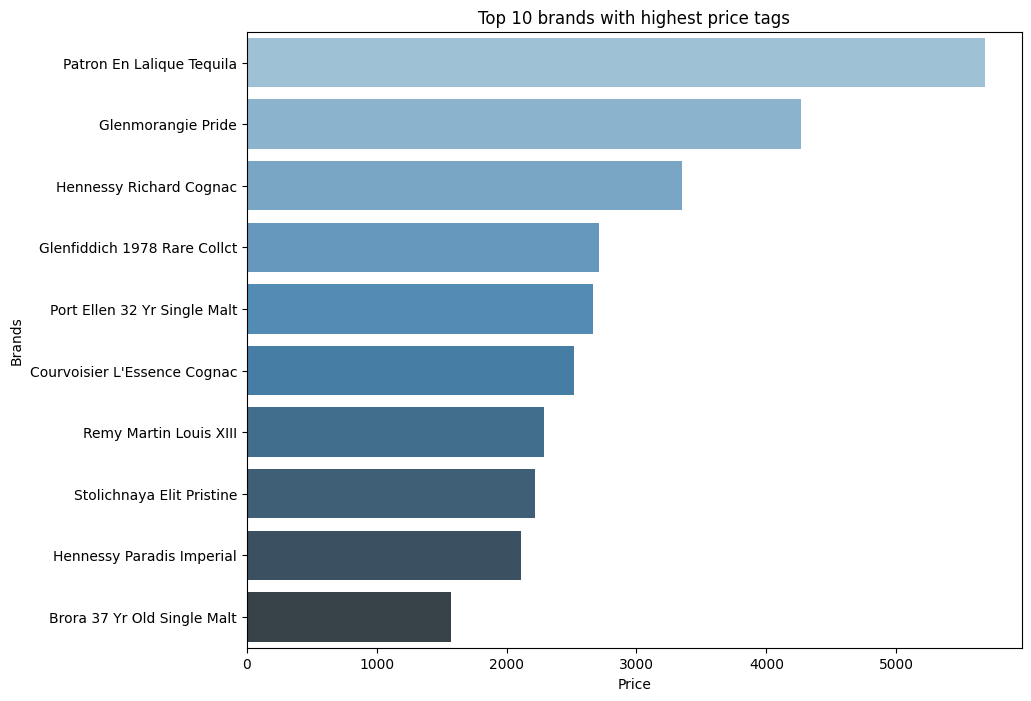

In [33]:
vc = purchases.groupby(['Description'])['PurchasePrice'].max().sort_values(ascending = False)[:10]
plt.figure(figsize = (10 , 8))
ax = sns.barplot(x = vc. values , y = vc.index , palette = 'Blues_d')
plt.title('Top 10 brands with highest price tags')
plt.xlabel('Price')
plt.ylabel('Brands')
plt.show()

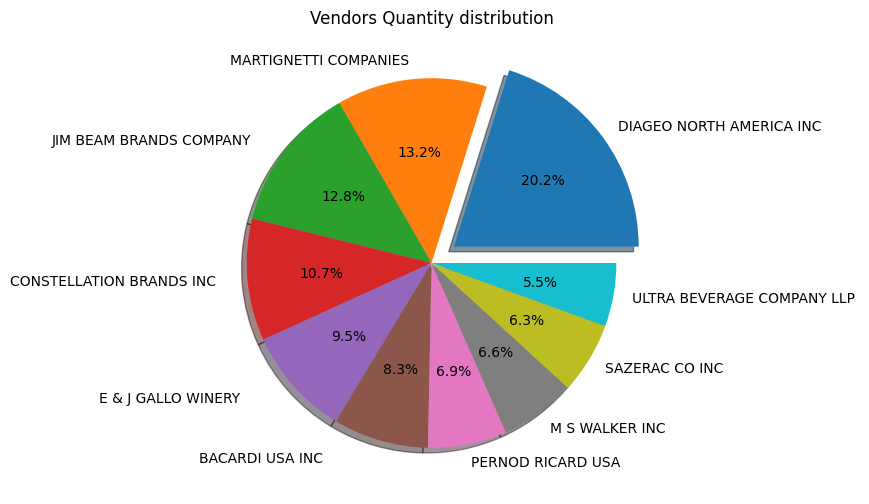

In [34]:
top_10vendor = invoice_purchases.groupby(['VendorName'])['Quantity'].max().sort_values(ascending = False)[:10]
plt.figure(figsize=(6,6))
plt.pie(top_10vendor , labels=top_10vendor.index , autopct = '%1.1f%%' , explode=(0.15,0,0,0,0,0,0,0,0,0),shadow=True)
plt.title('Vendors Quantity distribution')
plt.show()

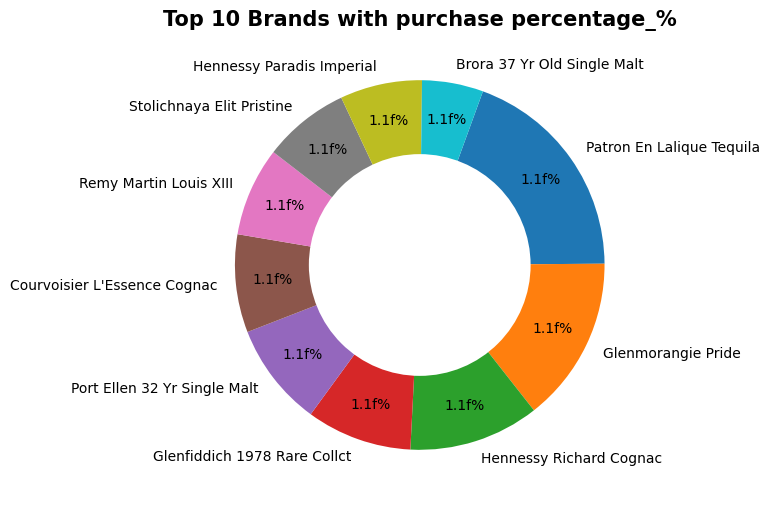

In [54]:
vc = purchases.groupby(['Description'])['PurchasePrice'].max().sort_values(ascending = False)[:10]
plt.figure(figsize = (10 , 6))
ax = plt.gca()
wedges , texts , autotexts = ax.pie (vc.values , labels = vc.index , autopct = '1.1f%%' , pctdistance=0.80, startangle=70, 
                                  counterclock=False)

center_circle = plt.Circle((0,0) , 0.60 , fc = 'white')
ax.add_artist(center_circle)
plt.title('Top 10 Brands with purchase percentage_%',fontweight='bold',fontsize=15)
plt.show()

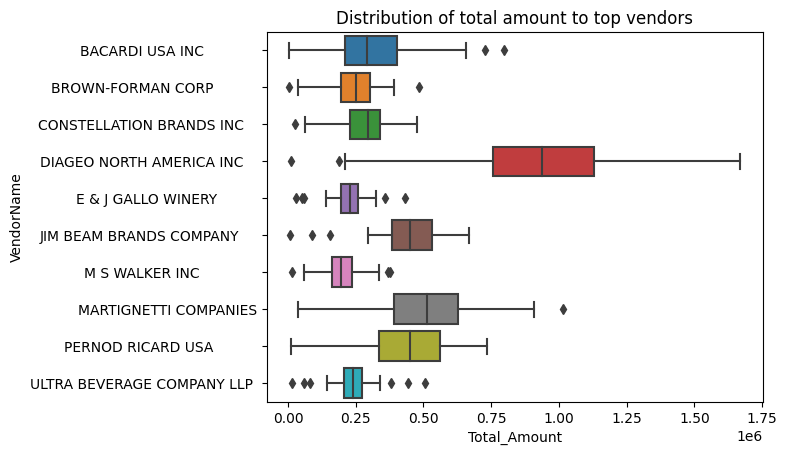

In [36]:
top_vendor_by_total_Amount = invoice_purchases.groupby(['VendorName'])['Total_Amount'].sum().sort_values(ascending= False).index[:10]
sns.boxplot(x = 'Total_Amount' , y = 'VendorName' , data = invoice_purchases[invoice_purchases['VendorName'].isin(top_vendor_by_total_Amount)])
plt.title('Distribution of total amount to top vendors')
plt.show()

In [50]:
top_10_brands = sales.groupby(['Description'])['Total Amount'].max().sort_values(ascending = False).index[:10]

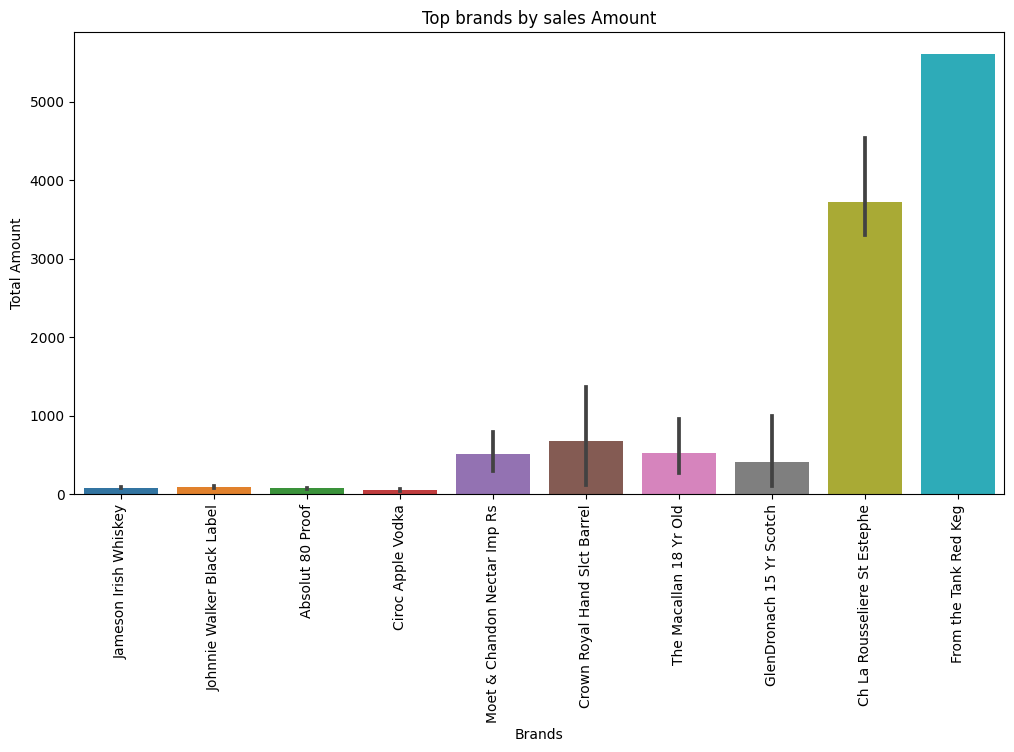

In [53]:
plt.figure(figsize = (12 , 6))
sns.barplot(x = 'Description' , y = 'Total Amount' , data = sales[sales['Description'].isin(top_10_brands)])
plt.title('Top brands by sales Amount')
plt.xlabel('Brands')
plt.ylabel('Total Amount')
plt.xticks(rotation = 'vertical')
plt.show()

In [74]:
max_quantity_vendor = purchases.groupby(['VendorName'])['Quantity'].max().sort_values(ascending= False)[:10]

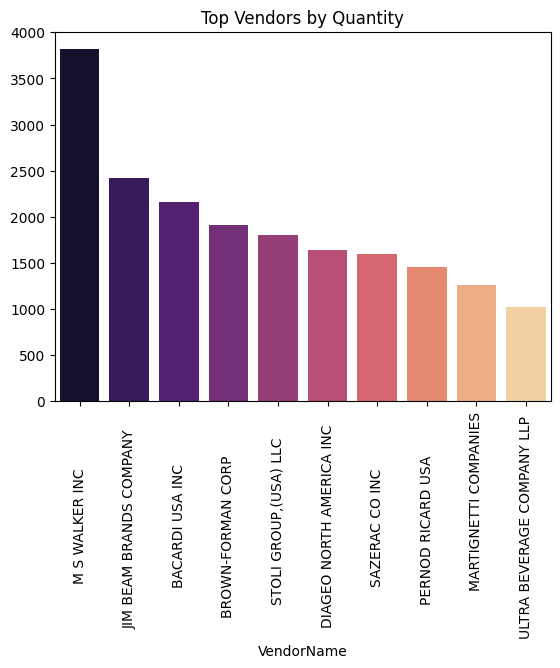

In [92]:
sns.barplot(x = max_quantity_vendor.index , y = max_quantity_vendor.values  ,data = invoice_purchases , palette = 'magma')
plt.title('Top Vendors by Quantity')
plt.xticks(rotation = 'vertical')
plt.show()